# Pandas DataFrame
--- 
- 시리즈는 단일 변수의 관측값을 기록하기에 적합하다. 
- 여러 변수에 대한 관측값을 함께 기록하기에는 데이터프레임이 적합하다. 
- 데이터프레임은 간단히 설명하면 인덱스 하나와 여러 시리즈를 합친 자료형이라고 할 수 있다.
- 판다스 라이브러리를 사용하면 엑셀, HTML, 데이터베이스로부터 데이터를 읽어와서 데이터프레임 형태로 가공할 수 있다. 

In [2]:
#딕셔너리를 이용한 데이터프레임 생성
import pandas as pd
df = pd.DataFrame({'KOSPI' : [1915,1961,2026,2467,2041], "KOSDAQ" : [542,682,631,798,675]},
                 index = [2014,2015,2016,2017,2018])
df

,KOSPI,KOSDAQ
2014,1915,542
2015,1961,682
2016,2026,631
2017,2467,798
2018,2041,675


In [4]:
#시리즈를 이용한 데이터프레임 생성
kospi = pd.Series([1915,1961,2026,2467,2041],
                 index = [2014,2015,2016,2017,2018], name = 'KOSPI')

kosdaq = pd.Series([542,682,631,798,675],
                  index = [2014,2015,2016,2017,2018], name = 'KOSDAQ')

df = pd.DataFrame({kospi.name: kospi, kosdaq.name: kosdaq})
df

2014    1915
2015    1961
2016    2026
2017    2467
2018    2041
Name: KOSPI, dtype: int64

In [9]:
#데이터프레임 순회 처리
for i in df.index:
    print(i, df['KOSPI'][i], df['KOSDAQ'][i])

2014 1915 542
2015 1961 682
2016 2026 631
2017 2467 798
2018 2041 675


In [10]:
#itertuples메서드는 각 행을 이름있는 튜플 형태로 반환된다. 
#itertuples()메서드가 Iterrows()메서드를 사용할 때보다 더 빠르다고 알려져 있다. 
for row in df.itertuples(name = 'KRX'):
    print(row)

KRX(Index=2014, KOSPI=1915, KOSDAQ=542)
KRX(Index=2015, KOSPI=1961, KOSDAQ=682)
KRX(Index=2016, KOSPI=2026, KOSDAQ=631)
KRX(Index=2017, KOSPI=2467, KOSDAQ=798)
KRX(Index=2018, KOSPI=2041, KOSDAQ=675)


In [11]:
for row in df.itertuples():
    print(row[0],row[1],row[2])

2014 1915 542
2015 1961 682
2016 2026 631
2017 2467 798
2018 2041 675


In [12]:
for idx, row in df.iterrows():
    print(idx, row[0], row[1])

2014 1915 542
2015 1961 682
2016 2026 631
2017 2467 798
2018 2041 675


# 주식 비교하기
---
- 야후 파이낸스를 사용해서 주식 가격을 비교한다.
- 야후 파이낸스의 경우, 미국 주식의 데이터는 정확하지만 국내 주식의 경우 데이터가 누락되거나 값이 틀린 경우가 있으니 주의가 필요하다.
- 여기서는 삼성전자와 마이크로소프트의 일별 주가 데이터를 야후 파이낸스로부터 다운로드받아서 어떤 종목의 수익률이 더 좋았는지 확인한다. 
- 사용하는 라이브러리: yfinance, pandas-datareader
- get_data_yahoo(조회할 주식 종목 [,start = 조회 기간의 시작일] [,end = 조회 기간의 종료일])

In [2]:
# pandas_datareader는 오픈 데이터를 쉽게 가져올 수 있게 작성된 라이브러리다. 
# pdr_override()는 get_data_yahoo() 함수를 호출하면 야후에서 데이터를 획득하는 방식이 
# 크롤링으로 변경되어 주가 데이터를 불러올 수 있게 하기 위함이다. 
# 원래는 종가와 수정종가가 같아야 하지만 데이터에 이상이 있어서 잘못 나와있다. 그래서 종가만 사용한다. 

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

sec = pdr.get_data_yahoo('005930.KS', start = '2018-05-04')
msft = pdr.get_data_yahoo('MSFT', start = '2018-05-04')
sec.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-04 00:00:00+09:00,53000.0,53900.0,51800.0,51900.0,45362.574219,39565391
2018-05-08 00:00:00+09:00,52600.0,53200.0,51900.0,52600.0,45974.398438,23104720
2018-05-09 00:00:00+09:00,52600.0,52800.0,50900.0,50900.0,44488.523438,16128305
2018-05-10 00:00:00+09:00,51700.0,51700.0,50600.0,51600.0,45100.355469,13905263
2018-05-11 00:00:00+09:00,52000.0,52200.0,51200.0,51300.0,44838.136719,10314997


In [3]:
tmp_msft = msft.drop(columns = 'Volume')
tmp_msft.tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2023-01-12 00:00:00-05:00,235.259995,239.899994,233.559998,238.509995,238.509995
2023-01-13 00:00:00-05:00,237.000000,239.369995,234.919998,239.229996,239.229996
2023-01-17 00:00:00-05:00,237.970001,240.910004,237.089996,240.350006,240.350006
2023-01-18 00:00:00-05:00,241.570007,242.380005,235.520004,235.809998,235.809998
2023-01-19 00:00:00-05:00,233.779999,235.429993,231.589996,232.139999,232.139999


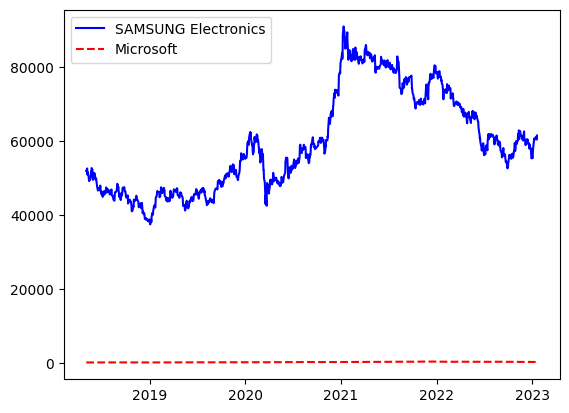

In [5]:
#원화와 달러의 스케일이 달라서 변동성이 보이지 않는다. 
import matplotlib.pyplot as plt
plt.plot(sec.index, sec.Close, 'b', label = 'SAMSUNG Electronics')
plt.plot(msft.index, msft.Close, 'r--', label = 'Microsoft')
plt.legend(loc= 'best')
plt.show()

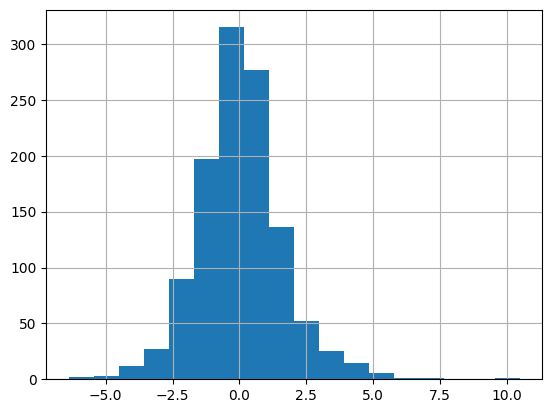

In [10]:
#변동성이 보이지 않기에 일간 변동률로 주가를 비교한다.
#오늘 변동률 = {(오늘 종가 - 어제종가)/어제종가 } * 100

import matplotlib.pyplot as plt

sec_dpc = (sec['Close']/sec['Close'].shift(1) -1) * 100
sec_dpc.iloc[0] = 0
plt.hist(sec_dpc,bins = 18)
plt.grid(True)
plt.show()

In [11]:
sec_dpc.describe()

count    1160.000000
mean        0.027672
std         1.619427
min        -6.387665
25%        -0.977100
50%         0.000000
75%         0.852361
max        10.470588
Name: Close, dtype: float64

In [17]:
#일간 변동률 누적곱 구하기
#이 값의 의미는 2018-05-04에 구매하면 현재의 수익률을 볼 수 있게 해준다. 
#아래의 식은 누적 수익률을 구할 때 사용할 유용한 식이니 주의깊게 봐두자.
sec_dpc_cp = ((100+sec_dpc)/100).cumprod()*100 - 100 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


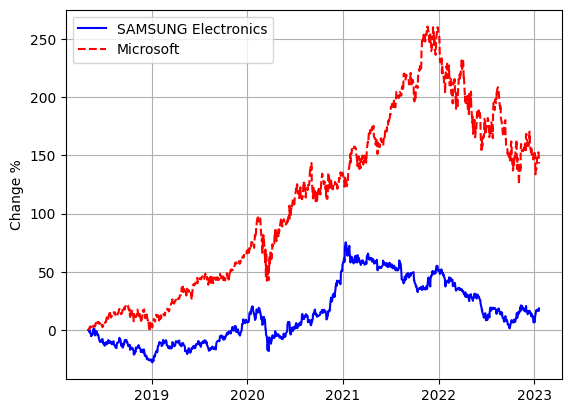

In [23]:
#위에서 실습한 내용들을 바탕으로 MS와 삼성전자의 누적 수익률을 비교해본다.
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
yf.pdr_override()

sec = pdr.get_data_yahoo('005930.KS', start = '2018-05-04')
sec_dpc = (sec['Close'] - sec['Close'].shift(1))/sec['Close'].shift(1) * 100
sec_dpc.iloc[0] = 0
sec_dpc_cp = ((100+sec_dpc)/100).cumprod() * 100 - 100 

msft = pdr.get_data_yahoo('MSFT', start = '2018-05-04')
msft_dpc = (msft['Close'] - msft['Close'].shift(1))/msft['Close'].shift(1) * 100
msft_dpc.iloc[0] = 0
msft_dpc_cp = ((100+msft_dpc)/100).cumprod() * 100 - 100 

plt.plot(sec.index, sec_dpc_cp, 'b', label = 'SAMSUNG Electronics')
plt.plot(msft.index, msft_dpc_cp, 'r--', label = 'Microsoft')
plt.ylabel('Change %')
plt.grid(True)
plt.legend(loc ='best')
plt.show()

[   1.2     1.56   -7.8   -70.2  -842.4 ]
